# High order statistic codes

Notebook for reading weak lensing maps maps and to run High order statistics code
All maps and codes are produced by the DESC-HOS topical team (https://github.com/LSSTDESC/HOS-Y1-prep)

- <font color='green'>map2alm </font>
- <font color='green'>Map3</font>
- <font color='green'>PDF_Peaks_Minima</font> -> runs in smoothed map
- integrated3PCF -> needs shear catalogues
- DSS -> needs foreground catalogues

In [2]:
cd ~/HOS-Y1-prep/hoscodes/

/global/u2/j/jatorres/HOS-Y1-prep/hoscodes


In [3]:
import numpy as np 
import matplotlib.pyplot as plt

In [4]:
import os
from HOScodes import *

# SkySim5000

We will run some of the statistics using the kappa maps from SkySim5000 simulation.

We need to define some input parameters such as the path to the directory of the map, the nside for healpix and so on. Some codes also need extra input such as the aperture radii $\theta_{{\rm ap}}$ for the Map$^3$ code.

In [5]:
raw_maps_path = '/global/cscratch1/sd/jatorres/KappaMapsLR/SkySim5000/'
sm_maps_path = '/global/cscratch1/sd/jatorres/smoothed_maps/SkySim5000/'
nside= 4096# We down the original resolution (NSIDE=8192) to the one used by the other maps
thetas=[4,8,16,32] #Aperture radii Map3
nshells = 57
seed=0
nzs='Euclid_dndz_fu08_bin1-5'
#
filenames = [raw_maps_path+'SkySim5000_'+nzs+'_kappa_tomo%d.fits'%l for l in range(1,6)]

Starting the class ${\tt hoscodes }$ will create directory for results to save results of individual statistics

In [ ]:
#kappa_maps_SkySim5000 = hoscodes(filenames=filenames,nshells=nshells,seed=0,nzs=nzs,nside=nside)
#kappa_maps_SkySim5000.readmaps_healpy()#read the maps from a healpy map(masked) file

We run some of the statistics for these maps: Map2 and Map3 codes. (iterating over the tomobins)

In [ ]:
#for i in range(kappa_maps_SkySim5000.Nbins):
#    kappa_maps_SkySim5000.run_map2alm(kappa_maps_SkySim5000.mapbins[i],i)
#    kappa_maps_SkySim5000.run_map3(kappa_maps_SkySim5000.mapbins[i],i,nside=kappa_maps_SkySim5000.nside,thetas=thetas)

We can also load the data from the ${\tt results/}$ directory

In [6]:
SkySim5000_map2 = []
SkySim5000_map3 = []
dir_results = 'results/'
for i in range(1,6):
    mapname = filenames[i-1].split('/')[-1]
    SkySim5000_map2.append(np.loadtxt(dir_results+mapname.split('.')[0]+'_map2_Cell_ell_0_5000.dat'))
    SkySim5000_map3.append(np.loadtxt(dir_results+mapname.split('.')[0]+'_map3_DV_thetas.dat'))

If you want to plot the data we need to know the values for the x-axis, which could be given by the user. We define these below (They can also be obtained from the main class).

In [7]:
from itertools import combinations_with_replacement

In [8]:
ell_map2_bins = np.arange(0,5001,1)
theta_tr = combinations_with_replacement([4,8,16,32],3)
theta_tr_map3_bins = list(theta_tr)

In [9]:
theta_tr_map3_bins
theta_format = [ '{}'.format(tr) for tr in theta_tr_map3_bins ]

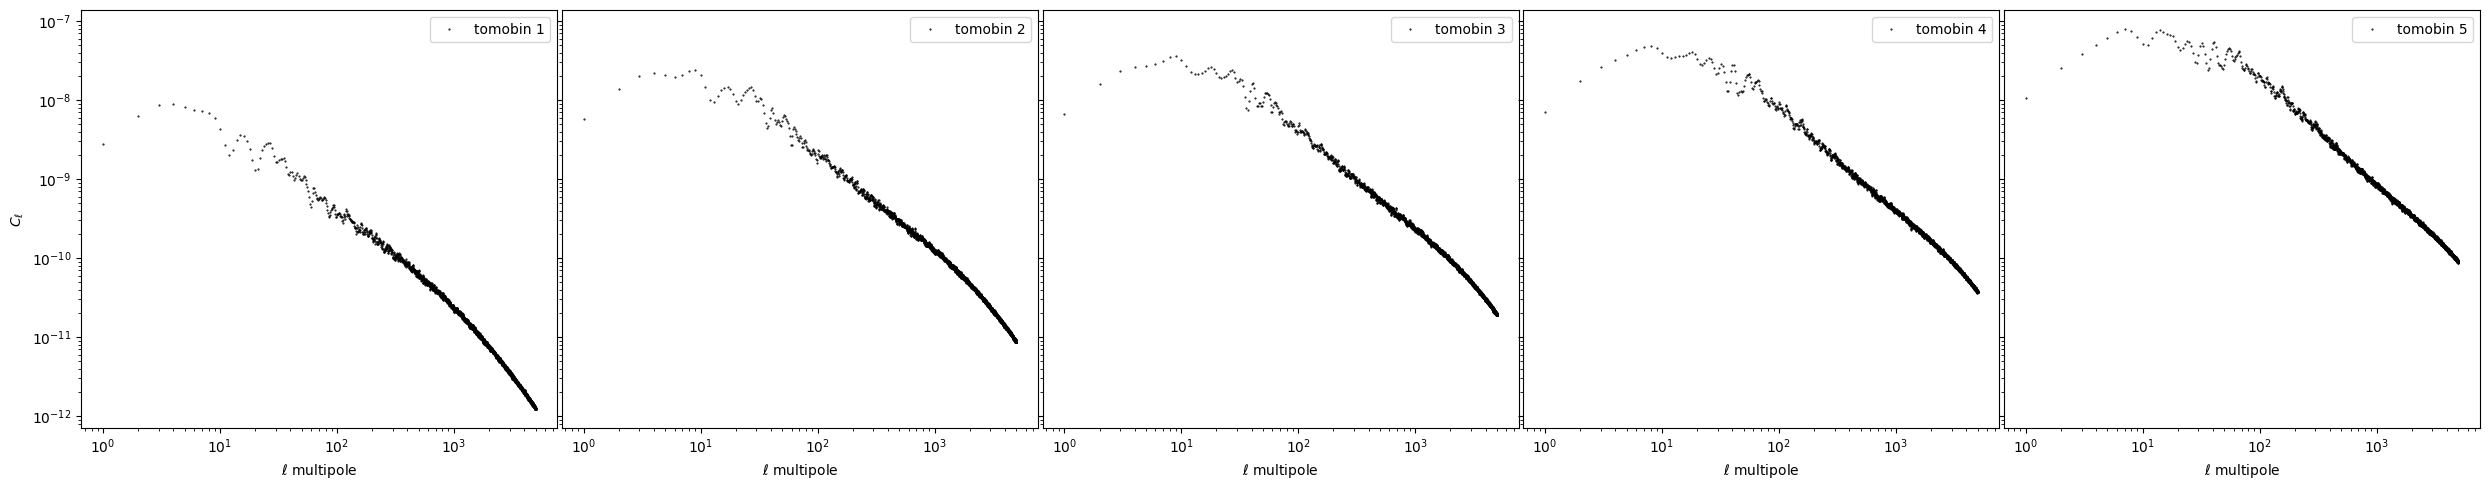

In [10]:
f,ax = plt.subplots(1,5,figsize=(25,5),sharex=True,sharey=True)
for i in range(5):
    ax[i].plot(ell_map2_bins,SkySim5000_map2[i],'k.',ms=1,label='tomobin %d'%(i+1))
    ax[i].legend(loc=1)
    ax[i].set_xlabel(r'$\ell$ multipole')
ax[0].set_ylabel(r'$C_\ell$')
ax[0].set_yscale('log')
ax[0].set_xscale('log')
plt.tight_layout()
plt.subplots_adjust(wspace=0.01)

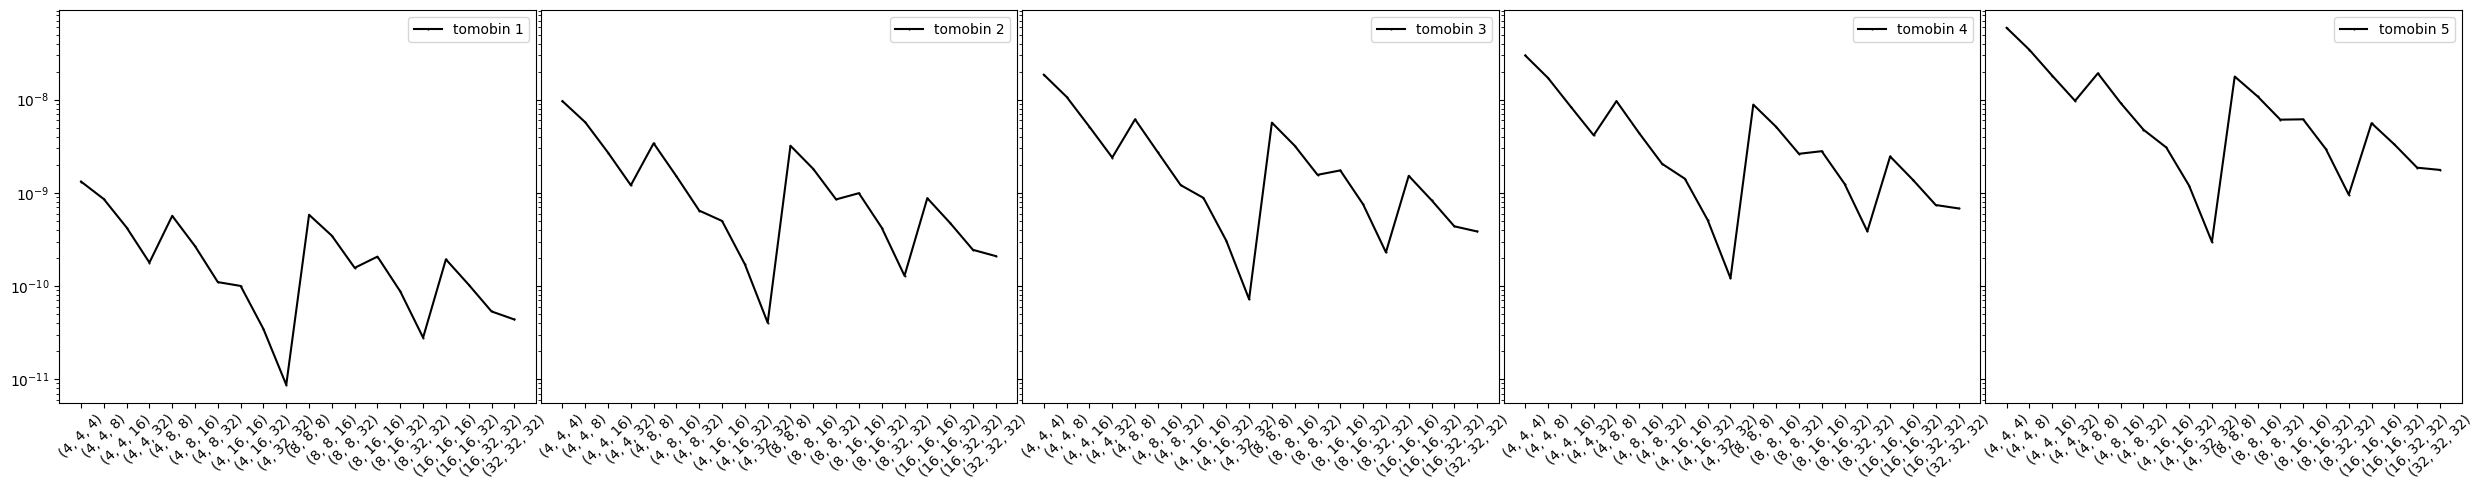

In [11]:
f,ax = plt.subplots(1,5,figsize=(25,5),sharex=True,sharey=True)
for i in range(5):
    ax[i].plot(np.arange(20),SkySim5000_map3[i],'k.-',ms=1,label='tomobin %d'%(i+1))
    ax[i].legend(loc=1)
    ax[i].set_xticks(np.arange(20))
    ax[i].set_xticklabels(theta_format, minor=False, rotation=45)

ax[0].set_yscale('log')
#ax[0].set_xscale('log')
plt.tight_layout()
plt.subplots_adjust(wspace=0.01)
plt.show()

## Smoothed maps

We can also add statitics for smoothed maps. Some statistics need smoothing of the map, otherwise you are impacted by shot noise when there is no galaxy shape noise, and noise dominated when there is galaxy shape noise.

We need to read pre-smoothed maps as the process is relatively slow right now.

In [12]:
filenames = [sm_maps_path+'smoothed_map_SkySim5000_'+nzs+'_kappa_tomo%d.fits'%l for l in range(1,6)]

In [ ]:
#kappa_maps_SkySim5000_smoothed = hoscodes(filenames=filenames,nshells=nshells,seed=0,nzs=nzs,nside=nside)
#kappa_maps_SkySim5000_smoothed.readmaps_healpy()#read the maps from a healpy map(masked) file

In [ ]:
#for i in range(kappa_maps_SkySim5000.Nbins):
#    kappa_maps_SkySim5000.run_PDFPeaksMinima(kappa_maps_SkySim5000.mapbins[i],i)

load results from ${\tt results/}$ directory

In [13]:
SkySim5000_counts = []
SkySim5000_peaks = []
SkySim5000_minima = []
dir_results = 'results/'
for i in range(1,6):
    mapname = filenames[i-1].split('/')[-1]
    SkySim5000_counts.append(np.loadtxt(dir_results+mapname.split('.')[0]+'_Counts_kappa_width0.1_200Kappabins.dat'))
    SkySim5000_peaks.append(np.loadtxt(dir_results+mapname.split('.')[0]+'_peaks_posRADEC_amp.dat'))
    SkySim5000_minima.append(np.loadtxt(dir_results+mapname.split('.')[0]+'_minima_posRADEC_amp.dat'))

In [14]:
bins=np.linspace(-0.1-0.001,0.1+0.001,201) 
binmids_kappacounts=(bins[1:]+bins[:-1])/2

bins=np.linspace(-0.05,0.05,50) #typical ranges and number of bins
binmids_peaks_minima=(bins[1:]+bins[:-1])/2

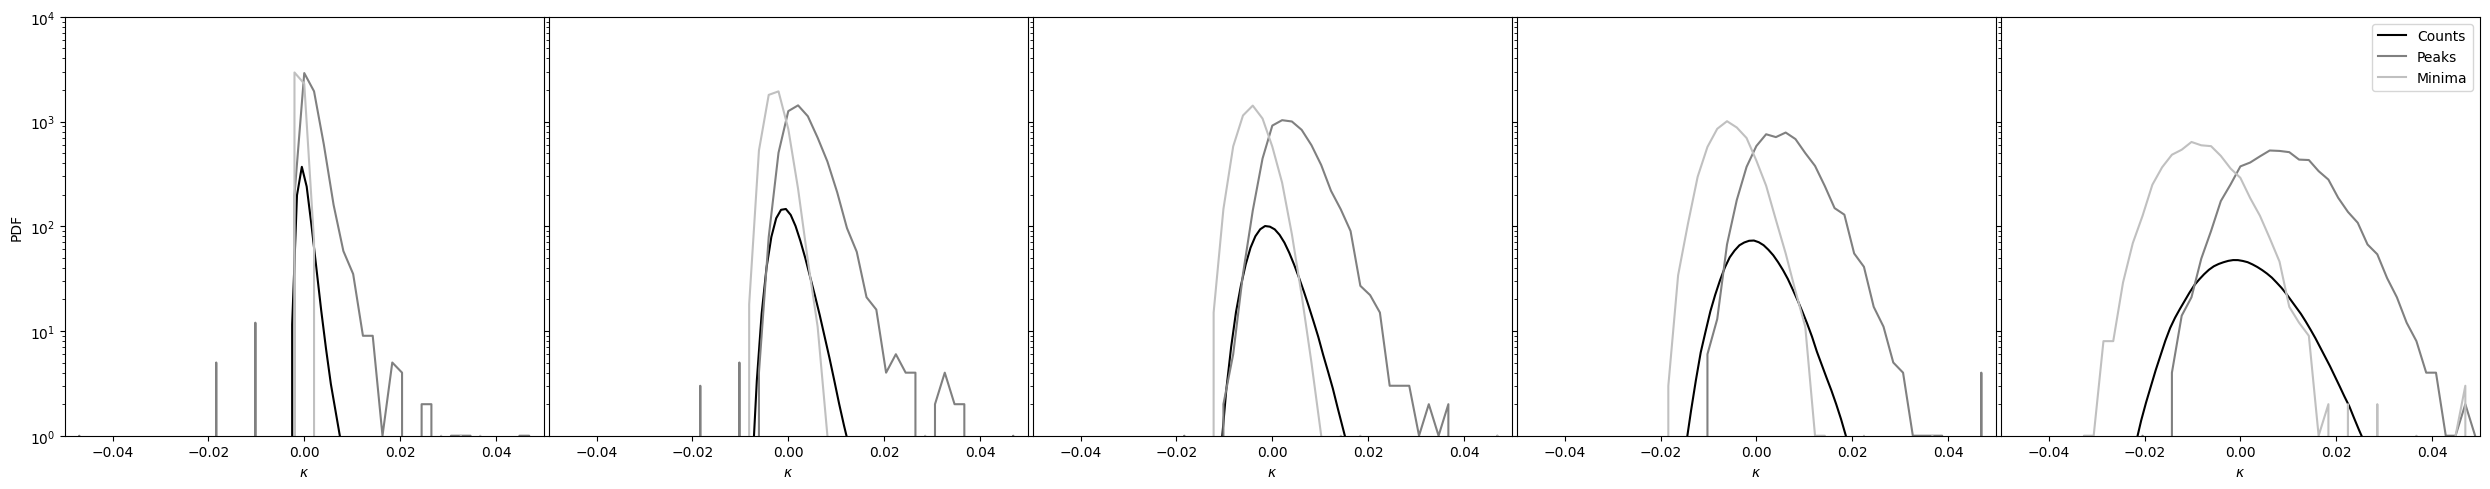

In [15]:
f,ax = plt.subplots(1,5,figsize=(25,5),sharex=True,sharey=True)
for i in range(5):
    ax[i].plot(binmids_kappacounts,SkySim5000_counts[i],'k-',label='Counts')
    counts_peaks,bins=np.histogram(SkySim5000_peaks[i],density=False,bins=bins)
    counts_minima,bins=np.histogram(SkySim5000_minima[i],density=False,bins=bins)
    ax[i].plot(binmids_peaks_minima,counts_peaks,'grey',label='Peaks')
    ax[i].plot(binmids_peaks_minima,counts_minima,'silver',label='Minima')
    ax[i].set_xlabel(r'$\kappa$')
ax[-1].legend(loc=1)
ax[0].set_xlim(-0.05,0.05)
ax[0].set_ylim(1e0,1e4)
ax[0].set_ylabel('PDF')
ax[0].set_yscale('log')
plt.tight_layout()
plt.subplots_adjust(wspace=0.01)
plt.show()

# HACC150-Y1 

We can repeat the same statistics for maps created using the HACC150-Y1 simulations. These maps are created using different nshells (19,50,106) for the tomographic bins, and there are also different seeds (0,1,2). We start with nshells = 50 which is more comparable to the SkySim5000 maps (nshell = 57).

## Nshells = 50

In [16]:
raw_maps_path = '/global/cscratch1/sd/xuod/HOS_sims/L845/HACC150/'
sm_maps_path = '/global/cscratch1/sd/jatorres/smoothed_maps/HACC150/'
nside= 4096# We down the original resolution (NSIDE=8192) to the one used by the other maps
thetas=[4,8,16,32] #Aperture radii Map3
nshell = 50
seed=0
nzs='kappa_Euclid_dndz_fu08_bin1-5'
#
filenames = [raw_maps_path+f'shells_z{nshell}_subsampleauto_groupiso/'+nzs+f'/kappa_hacc_nz%d_nside4096_seed{seed}.fits'%l for l in range(5)]
sm_filenames = [sm_maps_path+'smoothed_map_kappa_hacc_nz%d_nside4096_seed0_nshell%d.fits'%(l,nshell) for l in range(5)]

In [ ]:
#kappa_maps_HAC150_nshells50 = hoscodes(filenames=filenames,nshells=nshell,seed=seed,nzs=nzs,nside=nside)
#kappa_maps_HAC150_nshells50.readmaps_fits()#read the maps from a healpy map(masked) file
#kappa_maps_HAC150_nshells50_smoothed = hoscodes(filenames=sm_filenames,nshells=nshell,seed=seed,nzs=nzs,nside=nside)
#kappa_maps_HAC150_nshells50_smoothed.readmaps_healpy()#read the maps from a healpy map(masked) file

In [ ]:
#for i in range(3,5):
#    kappa_maps_HAC150_nshells50.run_map2alm(kappa_maps_HAC150_nshells50.mapbins[i],i)
#    kappa_maps_HAC150_nshells50.run_map3(kappa_maps_HAC150_nshells50.mapbins[i],i,nside=kappa_maps_HAC150_nshells50.nside,thetas=thetas)
#    kappa_masked = hp.ma(kappa_maps_HAC150_nshells50_smoothed.mapbins[i])
#    kappa_maps_HAC150_nshells50_smoothed.run_PDFPeaksMinima(kappa_masked,i)

In [17]:
HACC150_nshells50_map2 = []
HACC150_nshells50_map3 = []
HACC150_nshells50_counts = []
HACC150_nshells50_peaks = []
HACC150_nshells50_minima = []
dir_results = 'results/'
for i in range(1,6):
    mapname = filenames[i-1].split('/')[-1]
    sm_mapname = sm_filenames[i-1].split('/')[-1]
    HACC150_nshells50_map2.append(np.loadtxt(dir_results+mapname.split('.')[0]+'_nshell50_map2_Cell_ell_0_5000.dat'))
    HACC150_nshells50_map3.append(np.loadtxt(dir_results+mapname.split('.')[0]+'_nshell50_map3_DV_thetas.dat'))
    HACC150_nshells50_counts.append(np.loadtxt(dir_results+sm_mapname.split('.')[0]+'_Counts_kappa_width0.1_200Kappabins.dat'))
    HACC150_nshells50_peaks.append(np.loadtxt(dir_results+sm_mapname.split('.')[0]+'_peaks_posRADEC_amp.dat'))
    HACC150_nshells50_minima.append(np.loadtxt(dir_results+sm_mapname.split('.')[0]+'_minima_posRADEC_amp.dat'))

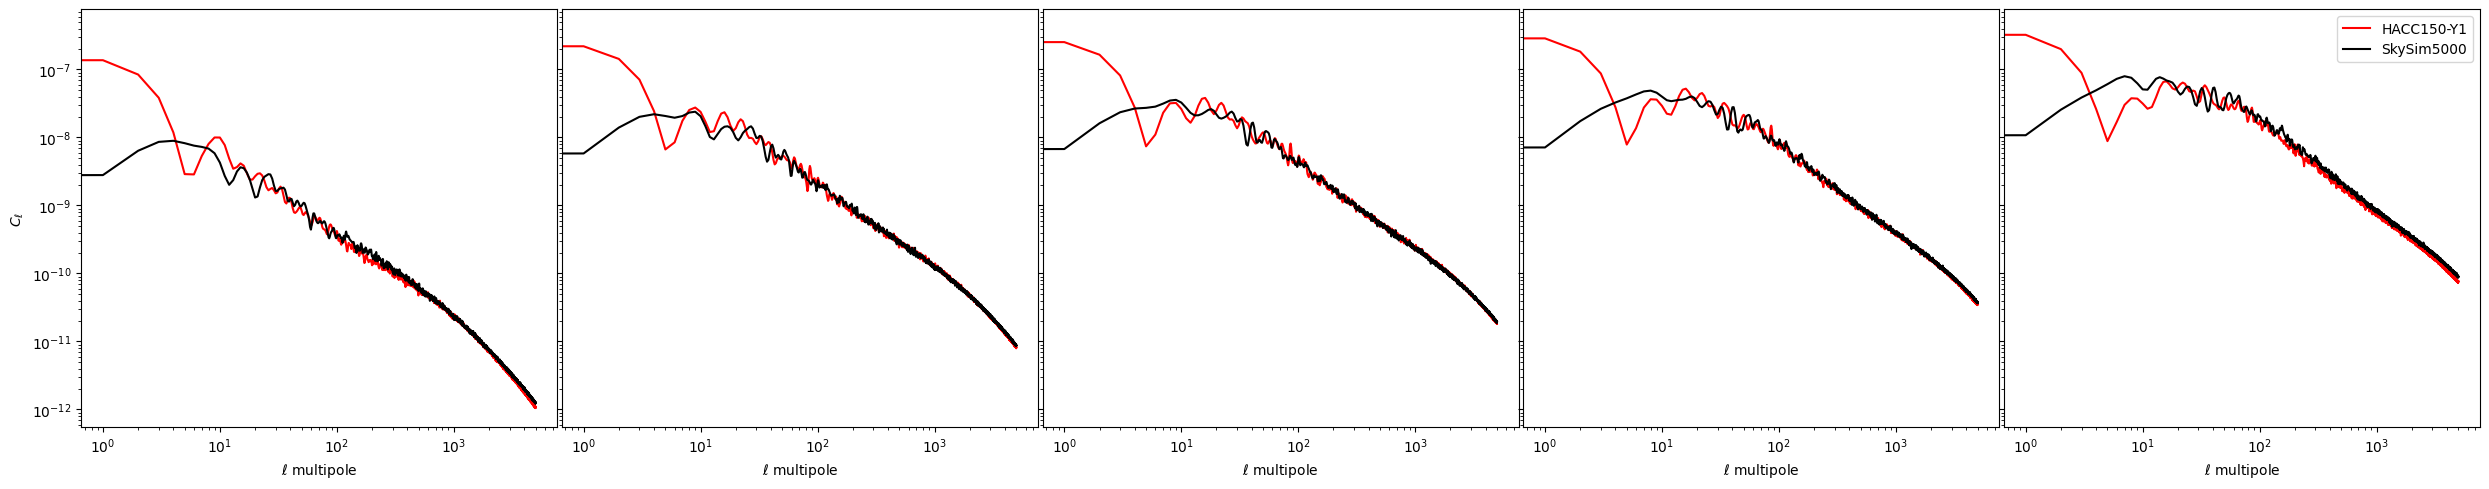

In [18]:
f,ax = plt.subplots(1,5,figsize=(25,5),sharex=True,sharey=True)
for i in range(5):
    l1, = ax[i].plot(ell_map2_bins,HACC150_nshells50_map2[i],'r-',ms=1)
    l2, = ax[i].plot(ell_map2_bins,SkySim5000_map2[i],'k-',ms=1)
    ax[i].set_xlabel(r'$\ell$ multipole')
ax[-1].legend([l1,l2],['HACC150-Y1','SkySim5000'],loc=1)
ax[0].set_ylabel(r'$C_\ell$')
ax[0].set_yscale('log')
ax[0].set_xscale('log')
plt.tight_layout()
plt.subplots_adjust(wspace=0.01)

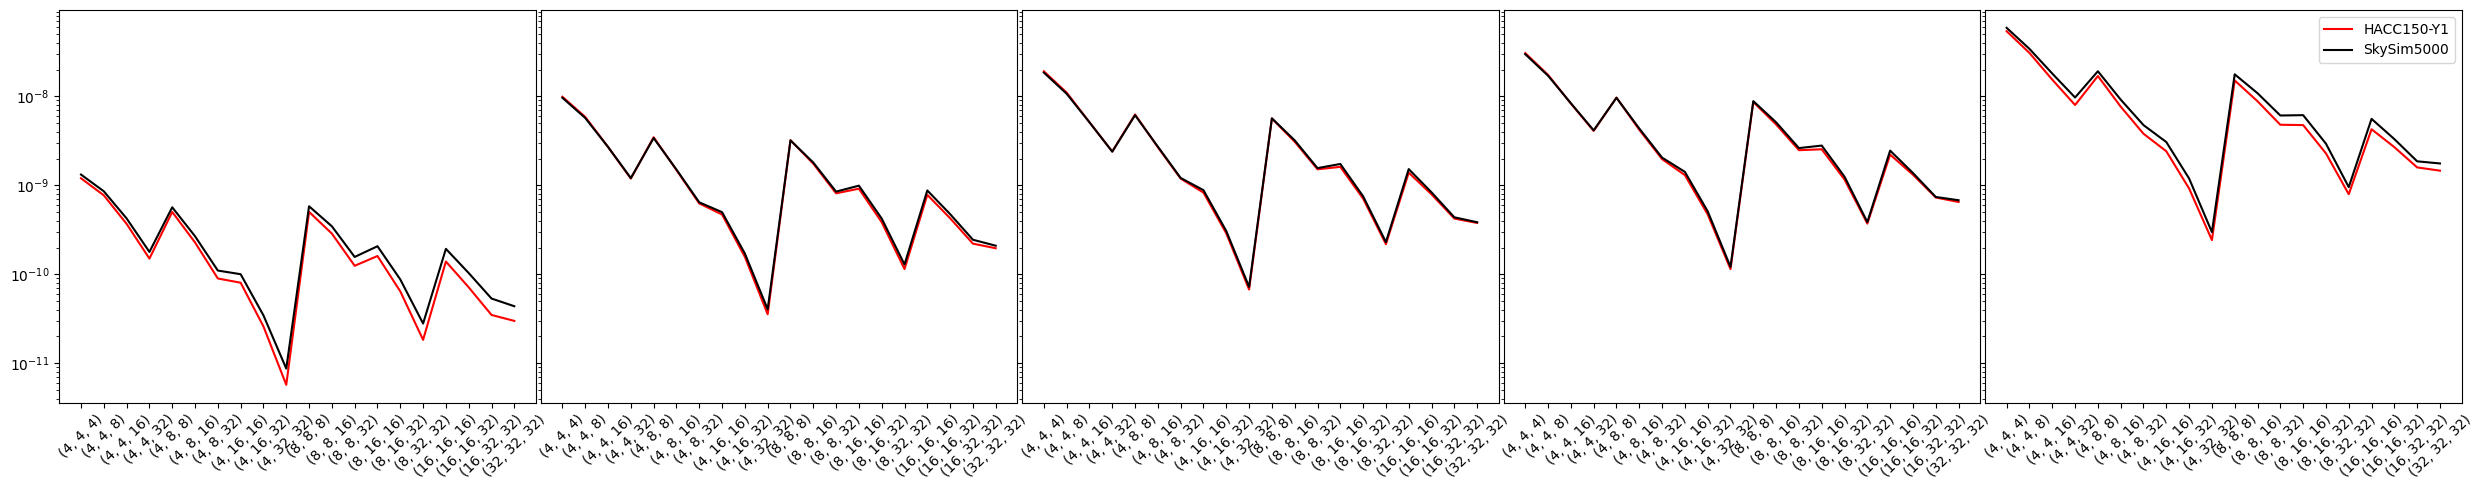

In [19]:
f,ax = plt.subplots(1,5,figsize=(25,5),sharex=True,sharey=True)
for i in range(5):
    ax[i].plot(np.arange(20),HACC150_nshells50_map3[i],'r-',ms=1)
    ax[i].plot(np.arange(20),SkySim5000_map3[i],'k-',ms=1)
    ax[i].set_xticks(np.arange(20))
    ax[i].set_xticklabels(theta_format, minor=False, rotation=45)
ax[-1].legend([l1,l2],['HACC150-Y1','SkySim5000'],loc=1)
ax[0].set_yscale('log')
#ax[0].set_xscale('log')
plt.tight_layout()
plt.subplots_adjust(wspace=0.01)
plt.show()

## Nshells = 19

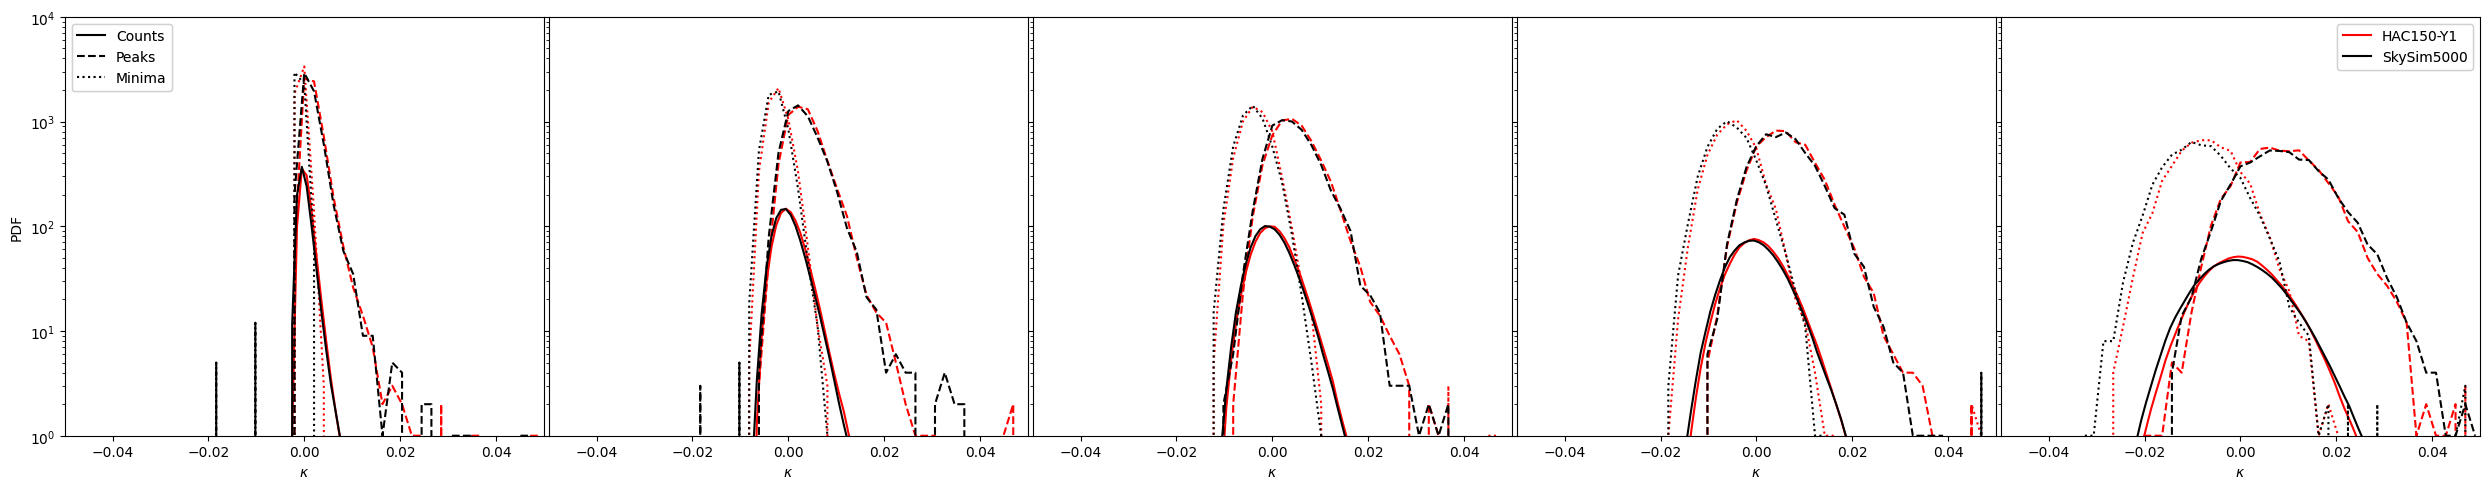

In [20]:
f,ax = plt.subplots(1,5,figsize=(25,5),sharex=True,sharey=True)
for i in range(5):
    l1,= ax[i].plot(binmids_kappacounts,HACC150_nshells50_counts[i],'r-')
    counts_peaks,bins=np.histogram(HACC150_nshells50_peaks[i],density=False,bins=bins)
    counts_minima,bins=np.histogram(HACC150_nshells50_minima[i],density=False,bins=bins)
    l2, = ax[i].plot(binmids_peaks_minima,counts_peaks,'r--')
    l3, = ax[i].plot(binmids_peaks_minima,counts_minima,'r:')
    #
    c1,=ax[i].plot(binmids_kappacounts,SkySim5000_counts[i],'k-')
    counts_peaks,bins=np.histogram(SkySim5000_peaks[i],density=False,bins=bins)
    counts_minima,bins=np.histogram(SkySim5000_minima[i],density=False,bins=bins)
    c2,=ax[i].plot(binmids_peaks_minima,counts_peaks,'k--')
    c3,=ax[i].plot(binmids_peaks_minima,counts_minima,'k:')
    ax[i].set_xlabel(r'$\kappa$')
a1 = ax[-1].legend([l1,c1],['HAC150-Y1','SkySim5000'],loc=1)
a2 = ax[0].legend([c1,c2,c3],['Counts','Peaks','Minima'],loc=2)
ax[-1].add_artist(a1)
ax[0].add_artist(a2)
ax[0].set_xlim(-0.05,0.05)
ax[0].set_ylim(1e0,1e4)
ax[0].set_ylabel('PDF')
ax[0].set_yscale('log')
plt.tight_layout()
plt.subplots_adjust(wspace=0.01)
plt.show()

## Nshells = 106

In [22]:
raw_maps_path = '/global/cscratch1/sd/xuod/HOS_sims/L845/HACC150/'
sm_maps_path = '/global/cscratch1/sd/jatorres/smoothed_maps/HACC150/'
nside= 4096# We down the original resolution (NSIDE=8192) to the one used by the other maps
thetas=[4,8,16,32] #Aperture radii Map3
nshell = 106
seed=0
nzs='kappa_Euclid_dndz_fu08_bin1-5'
#
filenames = [raw_maps_path+f'shells_z{nshell}_subsampleauto_groupiso/'+nzs+f'/kappa_hacc_nz%d_nside4096_seed{seed}.fits'%l for l in range(5)]
sm_filenames = [sm_maps_path+'smoothed_map_kappa_hacc_nz%d_nside4096_seed0_nshell%d.fits'%(l,nshell) for l in range(5)]
#
#kappa_maps_HAC150_nshells106 = hoscodes(filenames=filenames,nshells=nshell,seed=seed,nzs=nzs,nside=nside)
#kappa_maps_HAC150_nshells106.readmaps_fits()#read the maps from a healpy map(masked) file
#kappa_maps_HAC150_nshells106_smoothed = hoscodes(filenames=sm_filenames,nshells=nshell,seed=seed,nzs=nzs,nside=nside)
#kappa_maps_HAC150_nshells106_smoothed.readmaps_healpy()#read the maps from a healpy map(masked) file
#
HACC150_nshells106_map2 = []
HACC150_nshells106_map3 = []
HACC150_nshells106_counts = []
HACC150_nshells106_peaks = []
HACC150_nshells106_minima = []
dir_results = 'results/'
for i in range(1,6):
    mapname = filenames[i-1].split('/')[-1]
    sm_mapname = sm_filenames[i-1].split('/')[-1]
    HACC150_nshells106_map2.append(np.loadtxt(dir_results+mapname.split('.')[0]+'_nshell106_map2_Cell_ell_0_5000.dat'))
    HACC150_nshells106_map3.append(np.loadtxt(dir_results+mapname.split('.')[0]+'_nshell106_map3_DV_thetas.dat'))
    HACC150_nshells106_counts.append(np.loadtxt(dir_results+sm_mapname.split('.')[0]+'_nshell106_Counts_kappa_width0.1_200Kappabins.dat'))
    HACC150_nshells106_peaks.append(np.loadtxt(dir_results+sm_mapname.split('.')[0]+'_nshell106_peaks_posRADEC_amp.dat'))
    HACC150_nshells106_minima.append(np.loadtxt(dir_results+sm_mapname.split('.')[0]+'_nshell106_minima_posRADEC_amp.dat'))

## Nshells 19

In [23]:
raw_maps_path = '/global/cscratch1/sd/xuod/HOS_sims/L845/HACC150/'
sm_maps_path = '/global/cscratch1/sd/jatorres/smoothed_maps/HACC150/'
nside= 4096# We down the original resolution (NSIDE=8192) to the one used by the other maps
thetas=[4,8,16,32] #Aperture radii Map3
nshell = 19
seed=0
nzs='kappa_Euclid_dndz_fu08_bin1-5'
#
filenames = [raw_maps_path+f'shells_z{nshell}_subsampleauto_groupiso/'+nzs+f'/kappa_hacc_nz%d_nside4096_seed{seed}.fits'%l for l in range(5)]
sm_filenames = [sm_maps_path+'smoothed_map_kappa_hacc_nz%d_nside4096_seed0_nshell%d.fits'%(l,nshell) for l in range(5)]
#
#kappa_maps_HAC150_nshells19 = hoscodes(filenames=filenames,nshells=nshell,seed=seed,nzs=nzs,nside=nside)
#kappa_maps_HAC150_nshells19.readmaps_fits()#read the maps from a healpy map(masked) file
#kappa_maps_HAC150_nshells19_smoothed = hoscodes(filenames=sm_filenames,nshells=nshell,seed=seed,nzs=nzs,nside=nside)
#kappa_maps_HAC150_nshells19_smoothed.readmaps_healpy()#read the maps from a healpy map(masked) file
#
HACC150_nshells19_map2 = []
HACC150_nshells19_map3 = []
HACC150_nshells19_counts = []
HACC150_nshells19_peaks = []
HACC150_nshells19_minima = []
dir_results = 'results/'
for i in range(1,6):
    mapname = filenames[i-1].split('/')[-1]
    sm_mapname = sm_filenames[i-1].split('/')[-1]
    HACC150_nshells19_map2.append(np.loadtxt(dir_results+mapname.split('.')[0]+'_nshell19_map2_Cell_ell_0_5000.dat'))
    HACC150_nshells19_map3.append(np.loadtxt(dir_results+mapname.split('.')[0]+'_nshell19_map3_DV_thetas.dat'))
    HACC150_nshells19_counts.append(np.loadtxt(dir_results+sm_mapname.split('.')[0]+'_nshell19_Counts_kappa_width0.1_200Kappabins.dat'))
    HACC150_nshells19_peaks.append(np.loadtxt(dir_results+sm_mapname.split('.')[0]+'_nshell19_peaks_posRADEC_amp.dat'))
    HACC150_nshells19_minima.append(np.loadtxt(dir_results+sm_mapname.split('.')[0]+'_nshell19_minima_posRADEC_amp.dat'))

## SkySim5000, HAC150-Y1 

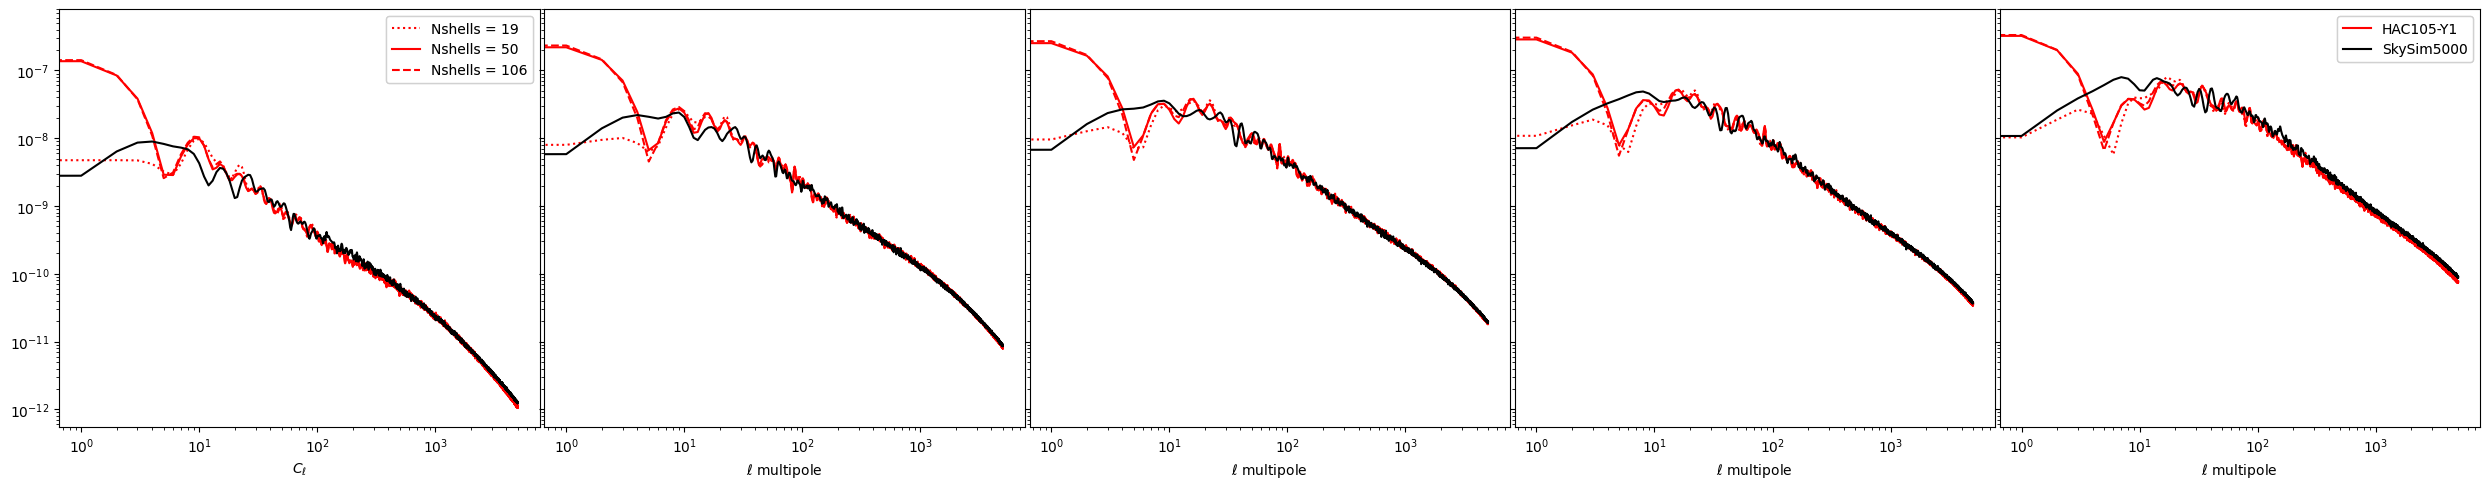

In [24]:
f,ax = plt.subplots(1,5,figsize=(25,5),sharex=True,sharey=True)
for i in range(5):
    l1,=ax[i].plot(ell_map2_bins,HACC150_nshells19_map2[i],'r:',ms=1)
    l2,=ax[i].plot(ell_map2_bins,HACC150_nshells50_map2[i],'r-',ms=1)
    l3,=ax[i].plot(ell_map2_bins,HACC150_nshells106_map2[i],'r--',ms=1)
    l4,=ax[i].plot(ell_map2_bins,SkySim5000_map2[i],'k-',ms=1)
    ax[i].set_xlabel(r'$\ell$ multipole')
a0 = ax[-1].legend([l2,l4],['HAC105-Y1','SkySim5000'],loc=1)
a1 = ax[0].legend([l1,l2,l3],['Nshells = 19','Nshells = 50','Nshells = 106'],loc=1)
ax[0].add_artist(a1)
ax[-1].add_artist(a0)
ax[0].set_xlabel(r'$C_\ell$')
ax[0].set_yscale('log')
ax[0].set_xscale('log')
plt.tight_layout()
plt.subplots_adjust(wspace=0.01)

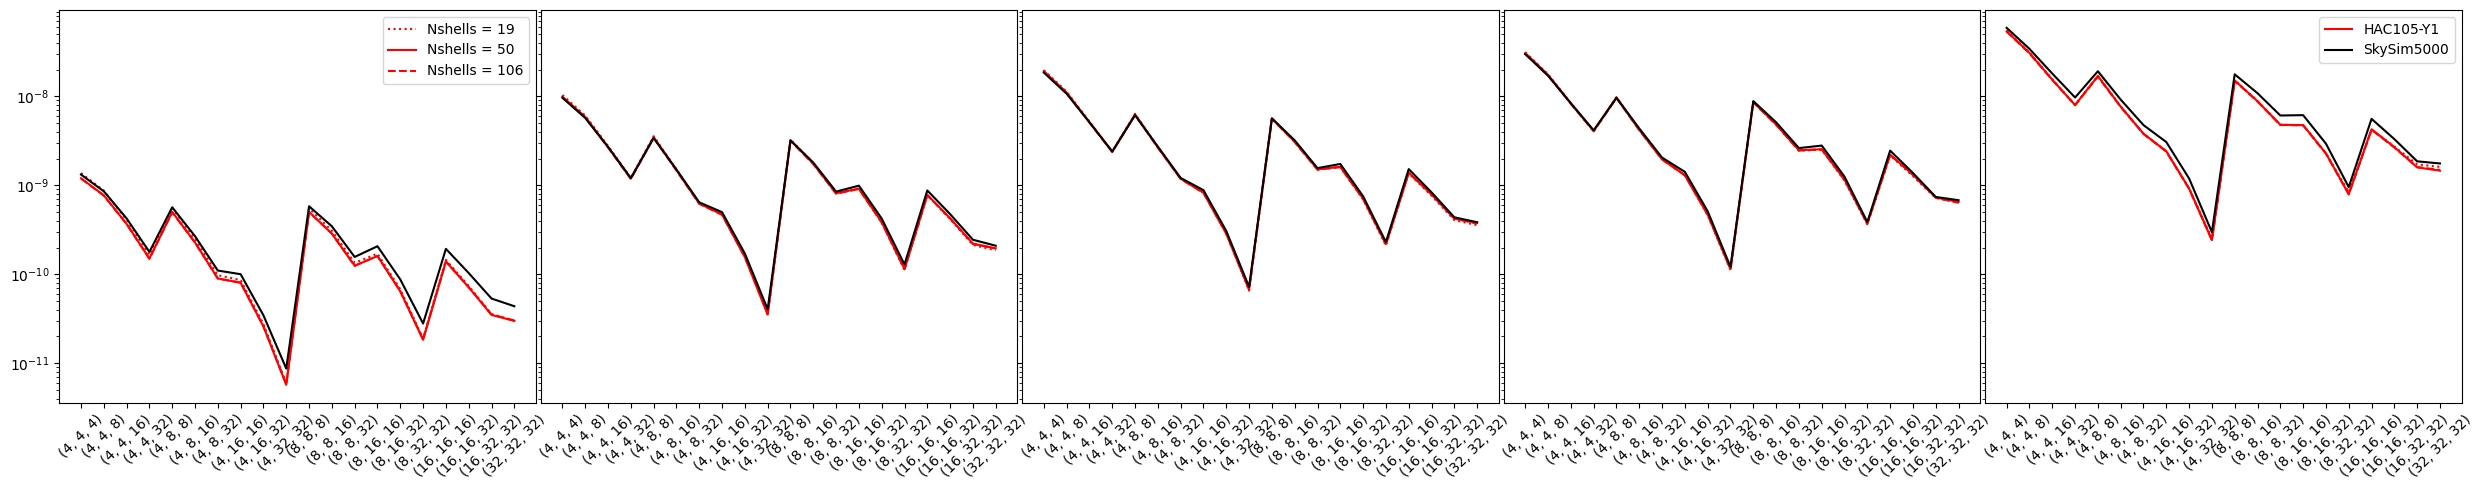

In [25]:
f,ax = plt.subplots(1,5,figsize=(25,5),sharex=True,sharey=True)
for i in range(5):
    l1,=ax[i].plot(np.arange(20),HACC150_nshells19_map3[i],'r:',ms=1)
    l2,=ax[i].plot(np.arange(20),HACC150_nshells50_map3[i],'r-',ms=1)
    l3,=ax[i].plot(np.arange(20),HACC150_nshells106_map3[i],'r--',ms=1)
    l4,=ax[i].plot(np.arange(20),SkySim5000_map3[i],'k-',ms=1)
    ax[i].set_xticks(np.arange(20))
    ax[i].set_xticklabels(theta_format, minor=False, rotation=45)

a0 = ax[-1].legend([l2,l4],['HAC105-Y1','SkySim5000'],loc=1)
a1 = ax[0].legend([l1,l2,l3],['Nshells = 19','Nshells = 50','Nshells = 106'],loc=1)
ax[0].set_yscale('log')
#ax[0].set_xscale('log')
plt.tight_layout()
plt.subplots_adjust(wspace=0.01)
plt.show()

## Nshells = 19

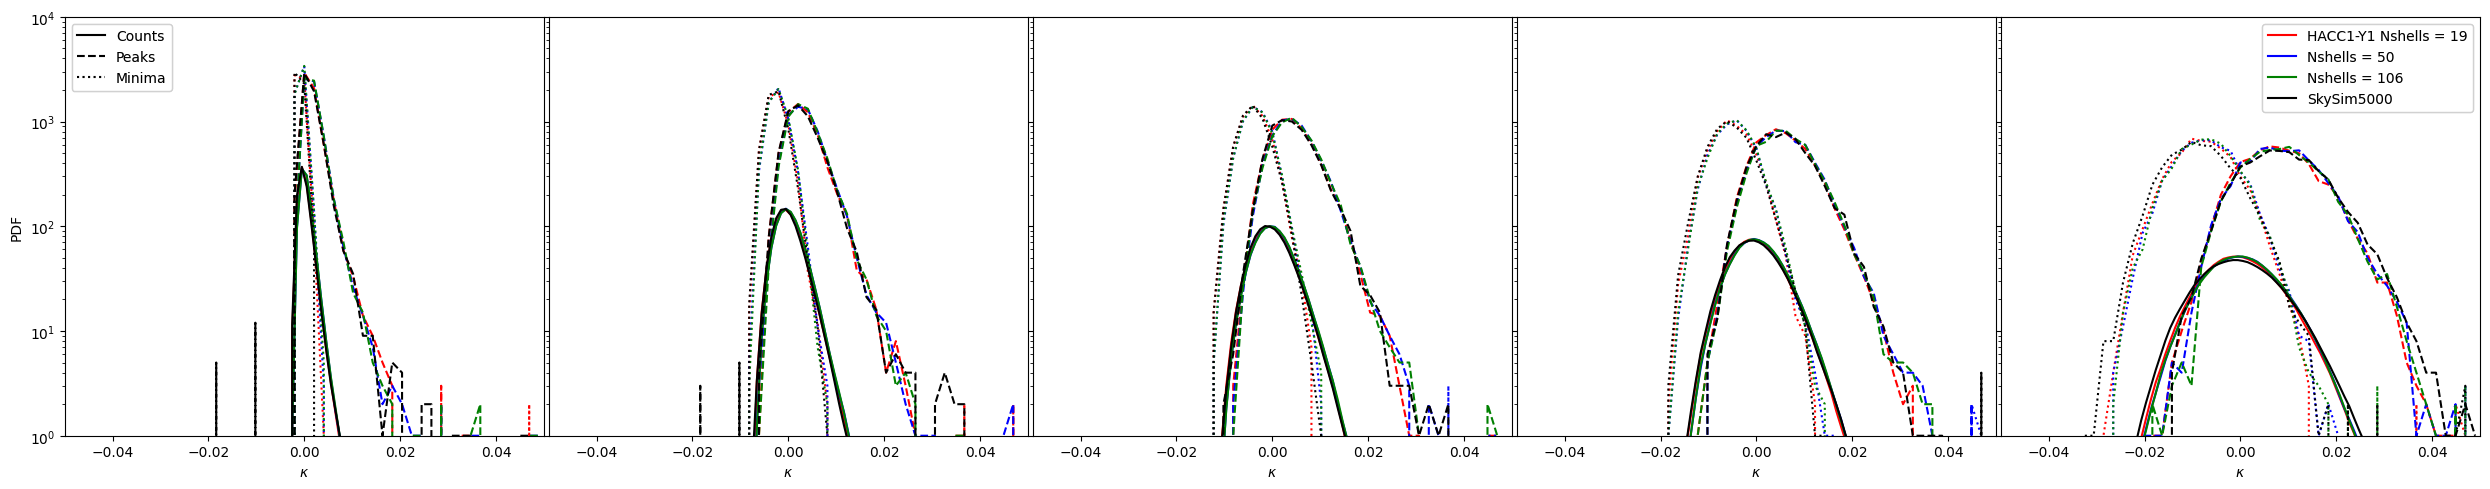

In [26]:
f,ax = plt.subplots(1,5,figsize=(25,5),sharex=True,sharey=True)
for i in range(5):
    l1, = ax[i].plot(binmids_kappacounts,HACC150_nshells19_counts[i],'r-')
    counts_peaks,bins=np.histogram(HACC150_nshells19_peaks[i],density=False,bins=bins)
    counts_minima,bins=np.histogram(HACC150_nshells19_minima[i],density=False,bins=bins)
    ax[i].plot(binmids_peaks_minima,counts_peaks,'r--')
    ax[i].plot(binmids_peaks_minima,counts_minima,'r:')
    #
    m1, = ax[i].plot(binmids_kappacounts,HACC150_nshells50_counts[i],'b-')
    counts_peaks,bins=np.histogram(HACC150_nshells50_peaks[i],density=False,bins=bins)
    counts_minima,bins=np.histogram(HACC150_nshells50_minima[i],density=False,bins=bins)
    ax[i].plot(binmids_peaks_minima,counts_peaks,'b--')
    ax[i].plot(binmids_peaks_minima,counts_minima,'b:')
    #
    n1, = ax[i].plot(binmids_kappacounts,HACC150_nshells106_counts[i],'g-')
    counts_peaks,bins=np.histogram(HACC150_nshells106_peaks[i],density=False,bins=bins)
    counts_minima,bins=np.histogram(HACC150_nshells106_minima[i],density=False,bins=bins)
    ax[i].plot(binmids_peaks_minima,counts_peaks,'g--')
    ax[i].plot(binmids_peaks_minima,counts_minima,'g:')
    #
    o1, = ax[i].plot(binmids_kappacounts,SkySim5000_counts[i],'k-')
    counts_peaks,bins=np.histogram(SkySim5000_peaks[i],density=False,bins=bins)
    counts_minima,bins=np.histogram(SkySim5000_minima[i],density=False,bins=bins)
    o2, = ax[i].plot(binmids_peaks_minima,counts_peaks,'k--')
    o3, = ax[i].plot(binmids_peaks_minima,counts_minima,'k:')
    ax[i].set_xlabel(r'$\kappa$')

a1 = ax[-1].legend([l1,m1,n1,o1],['HACC1-Y1 Nshells = 19','Nshells = 50','Nshells = 106','SkySim5000'],loc=1)
a2 = ax[0].legend([o1,o2,o3],['Counts','Peaks','Minima'],loc=2)
ax[-1].add_artist(a1)
ax[0].add_artist(a2)
ax[0].set_xlim(-0.05,0.05)
ax[0].set_ylim(1e0,1e4)
ax[0].set_ylabel('PDF')
ax[0].set_yscale('log')
plt.tight_layout()
plt.subplots_adjust(wspace=0.01)
plt.show()